In [1]:
import warnings
import math as mt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import plotly
import plotly.express as px
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
url = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/resedential.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.info

<bound method DataFrame.info of     Category  transportation million metric tons of carbon dioxide  \
0       1990                                               1588      
1       1991                                               1568      
2       1992                                               1592      
3       1993                                               1604      
4       1994                                               1644      
5       1995                                               1679      
6       1996                                               1724      
7       1997                                               1742      
8       1998                                               1779      
9       1999                                               1826      
10      2000                                               1870      
11      2001                                               1849      
12      2002                                              

In [5]:
data

,Category,transportation million metric tons of carbon dioxide,industrial million metric tons of carbon dioxide,residential million metric tons of carbon dioxide,commercial million metric tons of carbon dioxide
0,1990,1588,1697,963,793
1,1991,1568,1652,980,794
2,1992,1592,1726,981,796
3,1993,1604,1723,1039,819
4,1994,1644,1754,1032,833
5,1995,1679,1754,1039,851
6,1996,1724,1807,1099,883
7,1997,1742,1825,1090,926
8,1998,1779,1808,1097,947
9,1999,1826,1785,1122,960


In [6]:
newdata = data[["Category","residential million metric tons of carbon dioxide"]].rename(columns={'Category': "Year","residential million metric tons of carbon dioxide": "CO2"})

In [7]:
newdata.head()

,Year,CO2
0,1990,963
1,1991,980
2,1992,981
3,1993,1039
4,1994,1032


In [8]:
newdata.index = pd.to_datetime(newdata.Year, format = '%Y')

In [9]:
newdata.head()

,Year,CO2
Year,,
1990-01-01,1990,963
1991-01-01,1991,980
1992-01-01,1992,981
1993-01-01,1993,1039
1994-01-01,1994,1032


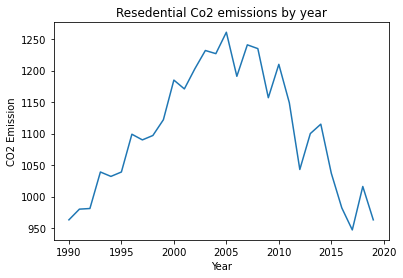

In [10]:
fig=plt.figure(1)
plot1 = fig.add_subplot(111)
plot1.set_xlabel('Year')
plot1.set_ylabel("CO2 Emission")
plot1.set_title("Resedential Co2 emissions by year")
plot1.plot("Year", "CO2", data = newdata)


In [11]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    
    plt.xlabel('Time in Years')
    plt.ylabel('Total Emissions')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= False)
    
    
    

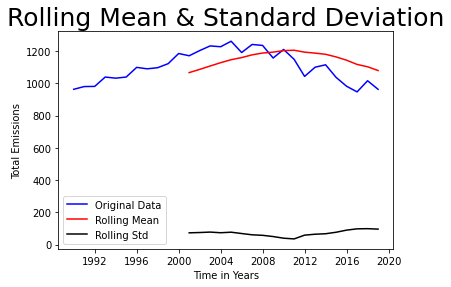

In [12]:
TestStationaryPlot(newdata.CO2)

In [13]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [14]:
TestStationaryAdfuller(newdata.CO2)

Test Statistic                 -2.659781
p-value                         0.081260
#Lags Used                      8.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets

In [16]:
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [17]:
newdata

,Year,CO2
Year,,
1990-01-01,1990,963
1991-01-01,1991,980
1992-01-01,1992,981
1993-01-01,1993,1039
1994-01-01,1994,1032
1995-01-01,1995,1039
1996-01-01,1996,1099
1997-01-01,1997,1090
1998-01-01,1998,1097


In [18]:
df = newdata["CO2"]

In [19]:
df

Year
1990-01-01     963
1991-01-01     980
1992-01-01     981
1993-01-01    1039
1994-01-01    1032
1995-01-01    1039
1996-01-01    1099
1997-01-01    1090
1998-01-01    1097
1999-01-01    1122
2000-01-01    1185
2001-01-01    1171
2002-01-01    1203
2003-01-01    1232
2004-01-01    1227
2005-01-01    1261
2006-01-01    1191
2007-01-01    1241
2008-01-01    1235
2009-01-01    1157
2010-01-01    1210
2011-01-01    1149
2012-01-01    1043
2013-01-01    1100
2014-01-01    1115
2015-01-01    1037
2016-01-01     982
2017-01-01     947
2018-01-01    1016
2019-01-01     963
Name: CO2, dtype: int64

In [20]:
for param in pdq:
    try:
        mod = ARIMA(df,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
        print(results.summary())
        print("----------------------------------------------------------------------------------------------------")
    except:
        continue

C:\Users\alice\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\alice\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

ARMA(0, 0, 0) - AIC:363.02056316234575
                              ARMA Model Results                              
Dep. Variable:                    CO2   No. Observations:                   30
Model:                     ARMA(0, 0)   Log Likelihood                -179.510
Method:                           css   S.D. of innovations             96.037
Date:                Fri, 29 Oct 2021   AIC                            363.021
Time:                        17:07:13   BIC                            365.823
Sample:                    01-01-1990   HQIC                           363.917
                         - 01-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1103.5667     17.534     62.939      0.000    1069.201    1137.933
--------------------------------------------------------------------------------------------

                             ARIMA Model Results                              
Dep. Variable:                  D.CO2   No. Observations:                   29
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -153.172
Method:                       css-mle   S.D. of innovations             47.572
Date:                Fri, 29 Oct 2021   AIC                            312.343
Time:                        17:07:14   BIC                            316.445
Sample:                    01-01-1991   HQIC                           313.628
                         - 01-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1949      7.504      0.026      0.979     -14.512      14.902
ar.L1.D.CO2    -0.1839      0.183     -1.003      0.316      -0.543       0.175
                                    Roots       

C:\Users\alice\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\alice\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

<AxesSubplot:xlabel='Year'>

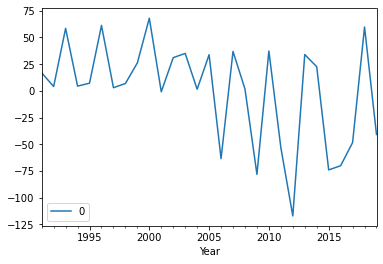

In [21]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

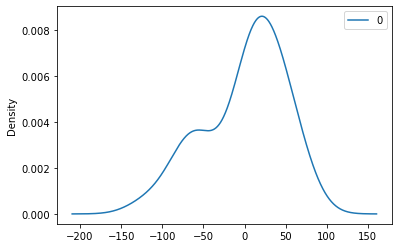

In [22]:
residuals.plot(kind='kde')


In [23]:
print(residuals.describe())

                0
count   29.000000
mean     0.144609
std     48.297646
min   -117.076703
25%    -40.877696
50%      6.888489
75%     34.028128
max     67.985137


C:\Users\alice\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

predicted=1216.730756, expected=1157.000000


C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1213.839083, expected=1210.000000


C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=1177.977981, expected=1149.000000
predicted=1150.208034, expected=1043.000000


C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\alice\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1897: RuntimeWarning: invalid value encountered in sqrt
  fcerr = np.sqrt(np.cumsum(cumsum_n(ma_rep, self.k_diff) ** 2) * sigma2)


predicted=1227.169134, expected=1100.000000
predicted=1026.046728, expected=1115.000000
predicted=1025.180261, expected=1037.000000
predicted=1065.625491, expected=982.000000
predicted=1015.965880, expected=947.000000
predicted=953.518029, expected=1016.000000
predicted=953.231699, expected=963.000000
Test RMSE: 71.280


C:\Users\alice\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


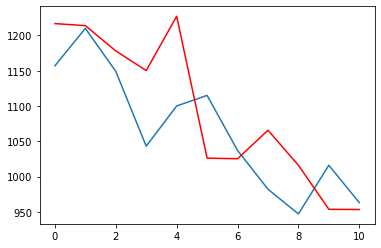

In [24]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mt.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()